In [116]:
# importing required libraries
import pandas as pd

In [118]:
data=pd.read_csv('/content/loan_data.csv')

In [119]:
# looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
# shape of the data
data.shape

(614, 13)

In [121]:
# checking missing values in the data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
# data types of the variables
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Categorical Data: Mode

In [123]:
# filling missing values of categorical variables with mode

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

### Continuous Data: Mean

In [124]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [125]:
# checking missing values after imputation
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Pearson correlation

In [126]:
from scipy.stats import pearsonr

In [127]:
data.corr(method='pearson')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


In [128]:
import seaborn as sn

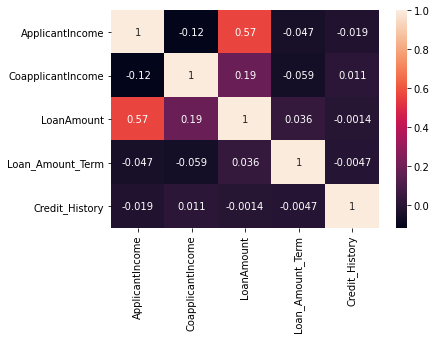

In [129]:
sn.heatmap(data.corr(method='pearson'), annot=True)
plt.show()

Converting categories to numbers

In [130]:
# converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [131]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## 3. Bringing all the variables in range 0 to 1

In [132]:
# bringing variables in the range 0 to 1 Normalization
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [133]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [134]:
# again looking at first five rows of pre-processed data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [135]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [136]:
data = data.drop('Loan_ID', axis=1)

In [137]:
X = data.drop('Loan_Status', axis=1)

In [138]:
y = data['Loan_Status']

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.3)

In [140]:
(X_train.shape, y_train.shape)

((429, 11), (429,))

In [172]:
scores=[]

In [141]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense 

In [142]:
# number of input neurons
X_train.shape

(429, 11)

In [143]:
# defining input neurons
input_neurons = X_train.shape[1]
#output neurons
output_neurons = 1
#hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [144]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [145]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [147]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
14/14 [==============================] - 0s 8ms/step - loss: 0.6618 - accuracy: 0.6946 - val_loss: 0.6557 - val_accuracy: 0.6973
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6923 - val_loss: 0.6433 - val_accuracy: 0.6973
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6876 - val_loss: 0.6320 - val_accuracy: 0.6919
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6876 - val_loss: 0.6212 - val_accuracy: 0.6865
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.6876 - val_loss: 0.6107 - val_accuracy: 0.6865
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.6876 - val_loss: 0.6020 - val_accuracy: 0.6865
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.6876 - val_loss: 0.5946 - val_accuracy: 0.6865
Epoch 8/50
14/14 [==

In [148]:
prediction = model.predict_classes(X_test)

In [149]:
accuracy_score(y_test, prediction)

0.8

In [173]:
scores.append(accuracy_score(y_test, prediction).mean())

Xgboost

In [150]:
from xgboost import XGBClassifier

In [151]:
xgclassifier = XGBClassifier()

In [152]:
# fit the model
xgclassifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [153]:
xgclassifier.score(X_test,y_test)

0.8108108108108109

In [174]:
scores.append(xgclassifier.score(X_test,y_test).mean())

Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
Tree=DecisionTreeClassifier()

In [156]:
#fit
Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [157]:
Tree.score(X_test, y_test)

0.7405405405405405

In [175]:
scores.append(Tree.score(X_test, y_test).mean())

Random forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
randforest=RandomForestClassifier(n_estimators=10)

In [160]:
randforest.fit(X_train,y_train)
randforest.score(X_test, y_test)

0.772972972972973

In [176]:
scores.append(randforest.score(X_test, y_test).mean())

Support vector

In [161]:
from  sklearn import svm

In [162]:
svm  =  svm.LinearSVC(max_iter=5000)

In [163]:
svm.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=5000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [164]:
svm.score(X_test, y_test)

0.8054054054054054

In [177]:
scores.append(svm.score(X_test, y_test).mean())

In [165]:
classifier = ('neuralnets','Gradient Boosting','Random Forest','Decision Tree','SVM')
y_pos = np.arange(len(classifier))

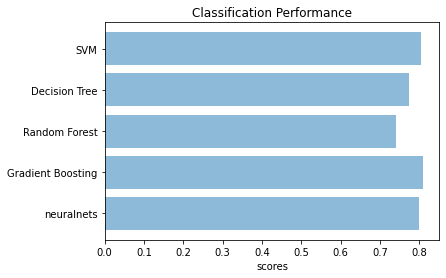

In [178]:
plt.barh(y_pos, scores, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('scores')
plt.title('Classification Performance')
plt.show()

Gradient boost have high score